# My Work:

## 1. Modeling:

In [2]:
# importing relevant libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [3]:
# load the dataframe
clothing = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/boutique.csv")
clothing.head()

,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73
1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73
2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82
3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33
4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35


In [4]:
# exploring the dataframe:

# dimensions of our dataframe
clothing.shape

(25000, 11)

In [5]:
# column information: non-null count and data types
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25000 non-null  int64  
 1   gender                   25000 non-null  object 
 2   age                      24980 non-null  float64
 3   height_cm                25000 non-null  int64  
 4   waist_size_cm            25000 non-null  int64  
 5   inseam_cm                24800 non-null  float64
 6   test_group               25000 non-null  int64  
 7   salary_self_report_in_k  24985 non-null  float64
 8   months_active            25000 non-null  int64  
 9   num_purchases            25000 non-null  int64  
 10  amount_spent_annual      25000 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.1+ MB


In [6]:
# summary statistics of the numerical features
clothing.describe()

,year,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
count,25000.000000,24980.000000,25000.000000,25000.000000,24800.000000,25000.00000,24985.000000,25000.000000,25000.000000,25000.000000
mean,2020.494720,32.529343,168.028480,94.990640,74.005565,0.50000,67.559163,12.031800,50.246000,792.786324
std,1.123861,8.378003,6.011888,7.040765,2.035485,0.50001,11.571951,6.938927,28.939877,164.844132
min,2019.000000,18.000000,144.000000,68.000000,66.000000,0.00000,23.570000,0.000000,0.000000,49.480000
25%,2019.000000,25.000000,164.000000,90.000000,73.000000,0.00000,59.760000,6.000000,25.000000,683.527500
50%,2020.000000,33.000000,168.000000,95.000000,74.000000,0.50000,67.590000,12.000000,50.000000,796.735000
75%,2022.000000,40.000000,172.000000,100.000000,75.000000,1.00000,75.440000,18.000000,75.000000,906.077500
max,2022.000000,47.000000,194.000000,125.000000,83.000000,1.00000,109.760000,24.000000,100.000000,1384.340000


In [7]:
# handling missing data:

# check for missing data
clothing.isnull().sum()

,0
year,0
gender,0
age,20
height_cm,0
waist_size_cm,0
inseam_cm,200
test_group,0
salary_self_report_in_k,15
months_active,0
num_purchases,0


> 3 columns with missing values: age (20), inseam_cm (200), and salary_self_report_in_k (15)

In [8]:
# since there are a few missing values for age and salary_self_report_in_k: drop these rows + reset index
clothing.dropna(subset=['age', 'salary_self_report_in_k'], inplace = True)
clothing.reset_index(drop = True, inplace = True)

In [9]:
# since there is a substantial number of missing values for inseam_cm column: fill these with the mean
mean_inseam = clothing['inseam_cm'].mean()
clothing['inseam_cm'].fillna(value = mean_inseam, inplace = True)

In [10]:
# verify all missing values are treated
clothing.isnull().sum()

,0
year,0
gender,0
age,0
height_cm,0
waist_size_cm,0
inseam_cm,0
test_group,0
salary_self_report_in_k,0
months_active,0
num_purchases,0


In [11]:
# re-examine the shape
clothing.shape

(24965, 11)

In [12]:
# next, z-score numerical features and one-hot-encode categorical features

# find the numerical features:
num_cols = clothing.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['year',
 'age',
 'height_cm',
 'waist_size_cm',
 'inseam_cm',
 'test_group',
 'salary_self_report_in_k',
 'months_active',
 'num_purchases',
 'amount_spent_annual']

In [13]:
# find the object columns:
obj_cols = clothing.select_dtypes(include = ['object']).columns.tolist()
obj_cols

['gender']

In [14]:
# since there is only one object column (gender), one-hot encoded this:

clothing = pd.get_dummies(clothing, columns = ['gender'])

In [15]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24965 entries, 0 to 24964
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     24965 non-null  int64  
 1   age                      24965 non-null  float64
 2   height_cm                24965 non-null  int64  
 3   waist_size_cm            24965 non-null  int64  
 4   inseam_cm                24965 non-null  float64
 5   test_group               24965 non-null  int64  
 6   salary_self_report_in_k  24965 non-null  float64
 7   months_active            24965 non-null  int64  
 8   num_purchases            24965 non-null  int64  
 9   amount_spent_annual      24965 non-null  float64
 10  gender_man               24965 non-null  bool   
 11  gender_nonbinary         24965 non-null  bool   
 12  gender_other             24965 non-null  bool   
 13  gender_woman             24965 non-null  bool   
dtypes: bool(4), float64(4)

In [16]:
# now we z-score our dataframe using sklearn's StandardScaler:
scaler = StandardScaler()
clothing_scaled = pd.DataFrame(scaler.fit_transform(clothing), columns=clothing.columns)

In [17]:
clothing.head()

,year,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual,gender_man,gender_nonbinary,gender_other,gender_woman
0,2020,34.0,168,98,75.0,0,69.83,21,89,729.73,False,False,False,True
1,2020,28.0,168,88,76.0,0,61.39,7,32,621.73,True,False,False,False
2,2021,18.0,170,95,75.0,0,80.55,2,25,820.82,False,False,False,True
3,2021,43.0,167,97,75.0,0,82.98,4,89,880.33,False,False,False,True
4,2021,29.0,173,89,74.0,0,62.00,5,95,690.35,False,False,True,False


In [18]:
clothing_scaled.head()

,year,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual,gender_man,gender_nonbinary,gender_other,gender_woman
0,-0.440400,0.175574,-0.004551,0.427469,0.490158,-1.00004,0.196355,1.292734,1.339282,-0.382744,-0.504315,-0.271594,-0.181362,0.659809
1,-0.440400,-0.540557,-0.004551,-0.992875,0.983402,-1.00004,-0.532918,-0.725182,-0.630508,-1.037883,1.982888,-0.271594,-0.181362,-1.515591
2,0.449273,-1.734108,0.328172,0.001365,0.490158,-1.00004,1.122636,-1.445866,-0.872412,0.169816,-0.504315,-0.271594,-0.181362,0.659809
3,0.449273,1.249769,-0.170913,0.285434,0.490158,-1.00004,1.332605,-1.157592,1.339282,0.530810,-0.504315,-0.271594,-0.181362,0.659809
4,0.449273,-0.421202,0.827257,-0.850841,-0.003087,-1.00004,-0.480210,-1.013455,1.546628,-0.621627,-0.504315,-0.271594,5.513848,-1.515591


In [19]:
# train-test-split the data
# the target variable is amount_spent_annual
# the features are all other columns

# define the target and features
y = clothing_scaled['amount_spent_annual']
X = clothing_scaled.drop('amount_spent_annual', axis = 1)

# perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# building the models

# LINEAR MODEL
# intialize the model:
linear_model = LinearRegression()

# fit the model to training data:
linear_model.fit(X_train, y_train)

# make predictions
y_pred_linear = linear_model.predict(X_test)

In [21]:
y_pred_linear

array([ 1.3454689 , -0.21083217,  0.17931304, ...,  1.12919509,
       -0.79733114, -0.22160126])

In [22]:
# POLYNOMIAL MODEL

# create polynomial features
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# intialize and fit a linear regression model with polynomial features
# We transform X to give the model more complex patterns to learn from.
# y is the true value we want the model to predict — it’s never altered in polynomial regression.

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# make predictions
y_pred_poly = poly_model.predict(X_test_poly)

In [23]:
y_pred_poly

array([ 2.29411342, -0.15588534,  0.03080319, ...,  0.64843728,
       -1.27392096,  0.0146176 ])

In [24]:
# Calculate MSE, MAE, MAPE, and R²
# define a function that calculates and prints the output:

def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # avoid zero-division in production!
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  R²:   {r2:.4f}")

In [25]:
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = y_pred_linear

evaluate_model(y_train, y_train_pred_linear, "Linear Regression (Train)")
evaluate_model(y_test, y_test_pred_linear, "Linear Regression (Test)")


Evaluation Metrics for Linear Regression (Train):
  MSE:  0.4765
  MAE:  0.5453
  MAPE: 327.65%
  R²:   0.5207

Evaluation Metrics for Linear Regression (Test):
  MSE:  0.4818
  MAE:  0.5457
  MAPE: 643.97%
  R²:   0.5292


In [26]:
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = y_pred_poly

evaluate_model(y_train, y_train_pred_poly, "Polynomial Regression (Train)")
evaluate_model(y_test, y_test_pred_poly, "Polynomial Regression (Test)")


Evaluation Metrics for Polynomial Regression (Train):
  MSE:  0.1153
  MAE:  0.2711
  MAPE: 239.40%
  R²:   0.8840

Evaluation Metrics for Polynomial Regression (Test):
  MSE:  0.1118
  MAE:  0.2661
  MAPE: 202.92%
  R²:   0.8907


> Polynomial regression outperforms linear regression model across all metrics
 - Polynomial Regression:
  - MSE & MAE are significantly lower than Linear Regression → better accuracy.
  - R² is ~0.89 on both train and test → this model explains ~89% of the variance in the target.
  - The MAPE is still high, though better than Linear Regression. This suggests issues with percentage-based error when actual values are near zero.
 - Linear Regression:
  - Lower R² (≈ 0.52) → only ~52% of the variance in spending is explained.
  - High MSE and MAE → larger absolute and squared errors.
  - Very high MAPE (especially 644% on test) → this metric is very sensitive to small true values, so actual amount_spent_annual likely includes some near-zero values.



## 2. Graphs:

Questions were exploring:
1. Does being in the experimental test_group actually increase the amount a customer spends at the store? Is this relationship different for the different genders?
2. Does making more money (salary) tend to increase the number of purchases someone makes? Does it increase the total amount spent?
3. In which year did the store's customers make the most money? Were the store's sales highest in those years?
4. People who are not your "average" size often find it difficult to buy clothes in traditional stores. Is there a relationship between inseam and amount spent in the store annually? Is there a relationship between height and amount spent in the store annually?
5. In this dataset, is there a relationship between salary and height? Is it different for the different genders?
6. The store is interested in whether their customer base has changed over time. Present the minimum, maximum, and average height, waist size, and inseam for each year.

In [27]:
clothing.head()

,year,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual,gender_man,gender_nonbinary,gender_other,gender_woman
0,2020,34.0,168,98,75.0,0,69.83,21,89,729.73,False,False,False,True
1,2020,28.0,168,88,76.0,0,61.39,7,32,621.73,True,False,False,False
2,2021,18.0,170,95,75.0,0,80.55,2,25,820.82,False,False,False,True
3,2021,43.0,167,97,75.0,0,82.98,4,89,880.33,False,False,False,True
4,2021,29.0,173,89,74.0,0,62.00,5,95,690.35,False,False,True,False


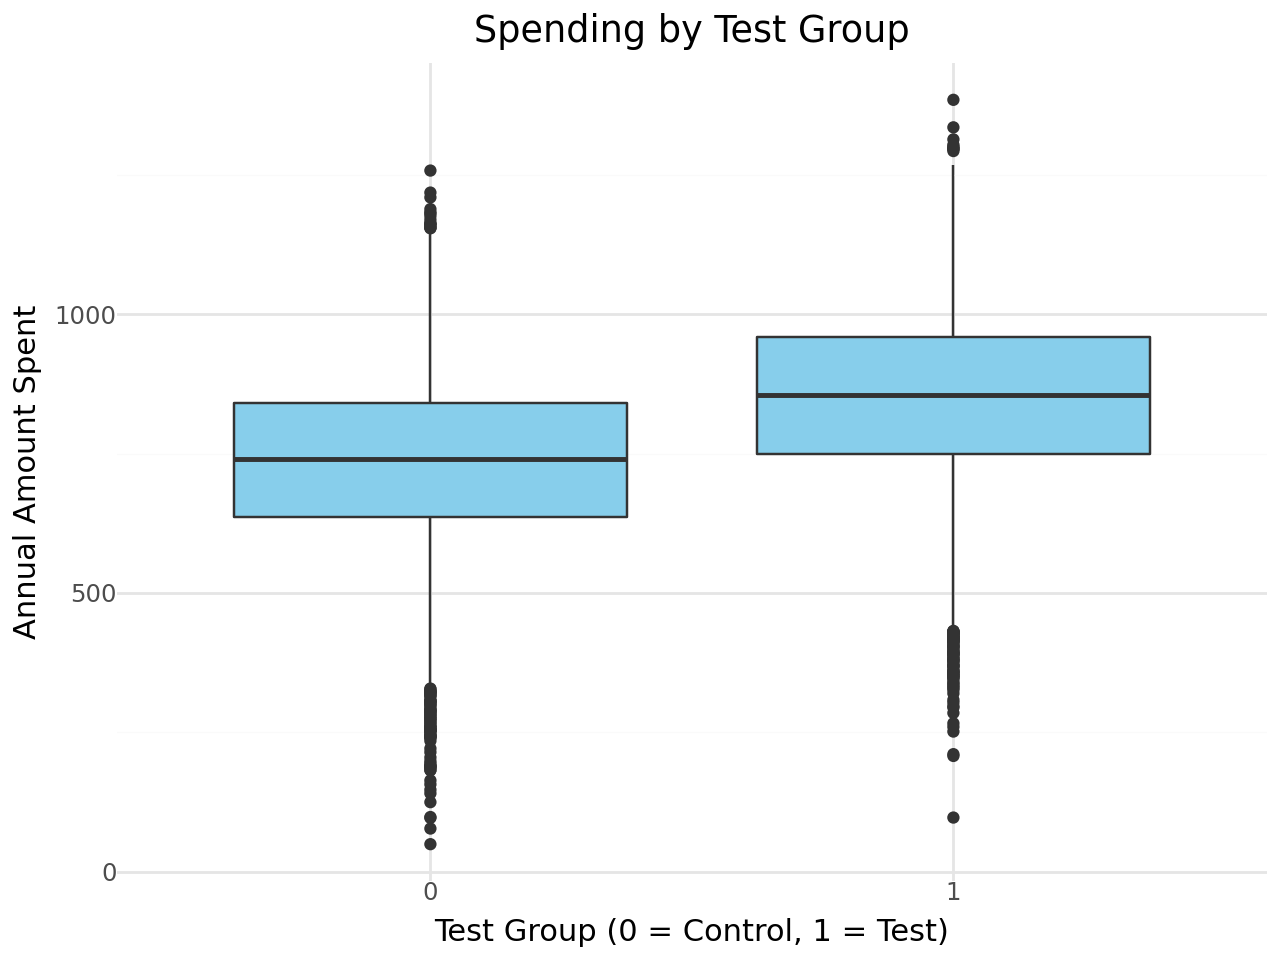

In [28]:
# Does being in the test group increase the amount spent at a store:

(ggplot(clothing, aes(x='factor(test_group)', y='amount_spent_annual')) +
    geom_boxplot(fill = 'skyblue') +
    labs(x='Test Group (0 = Control, 1 = Test)', y='Annual Amount Spent', title='Spending by Test Group') +
    theme_minimal()
)


> The boxplot shows illustrates the distribution of relative annual spending for those a part and not a part of test groups. From the graph, those that participated in the test_group spends more on average indicated by the box plot that is more shifted up.

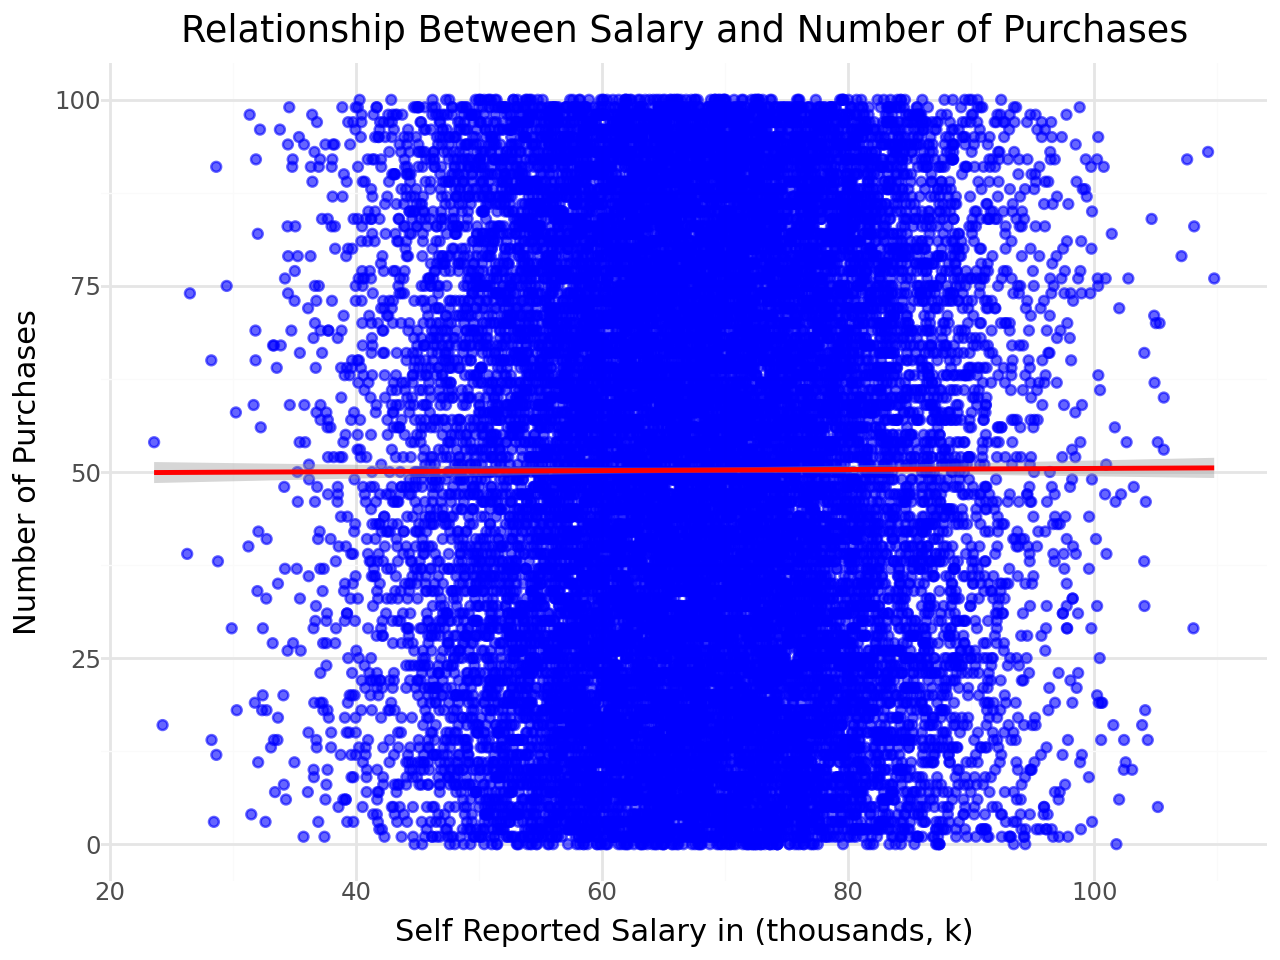

In [29]:
# Does having a higher salary increase the number of purchases made and total amount spent?
(ggplot(clothing, aes(x = 'salary_self_report_in_k', y = 'num_purchases')) +
  geom_point(alpha = 0.6, color = 'blue') +
  geom_smooth(method = 'lm', color = 'red') +
  labs(title = 'Relationship Between Salary and Number of Purchases',
       x = 'Self Reported Salary in (thousands, k)',
       y = 'Number of Purchases') +
 theme_minimal())

> The scatter plot between salary and number of purchases show that there is no clear indication of a linear relationship between these two variables.

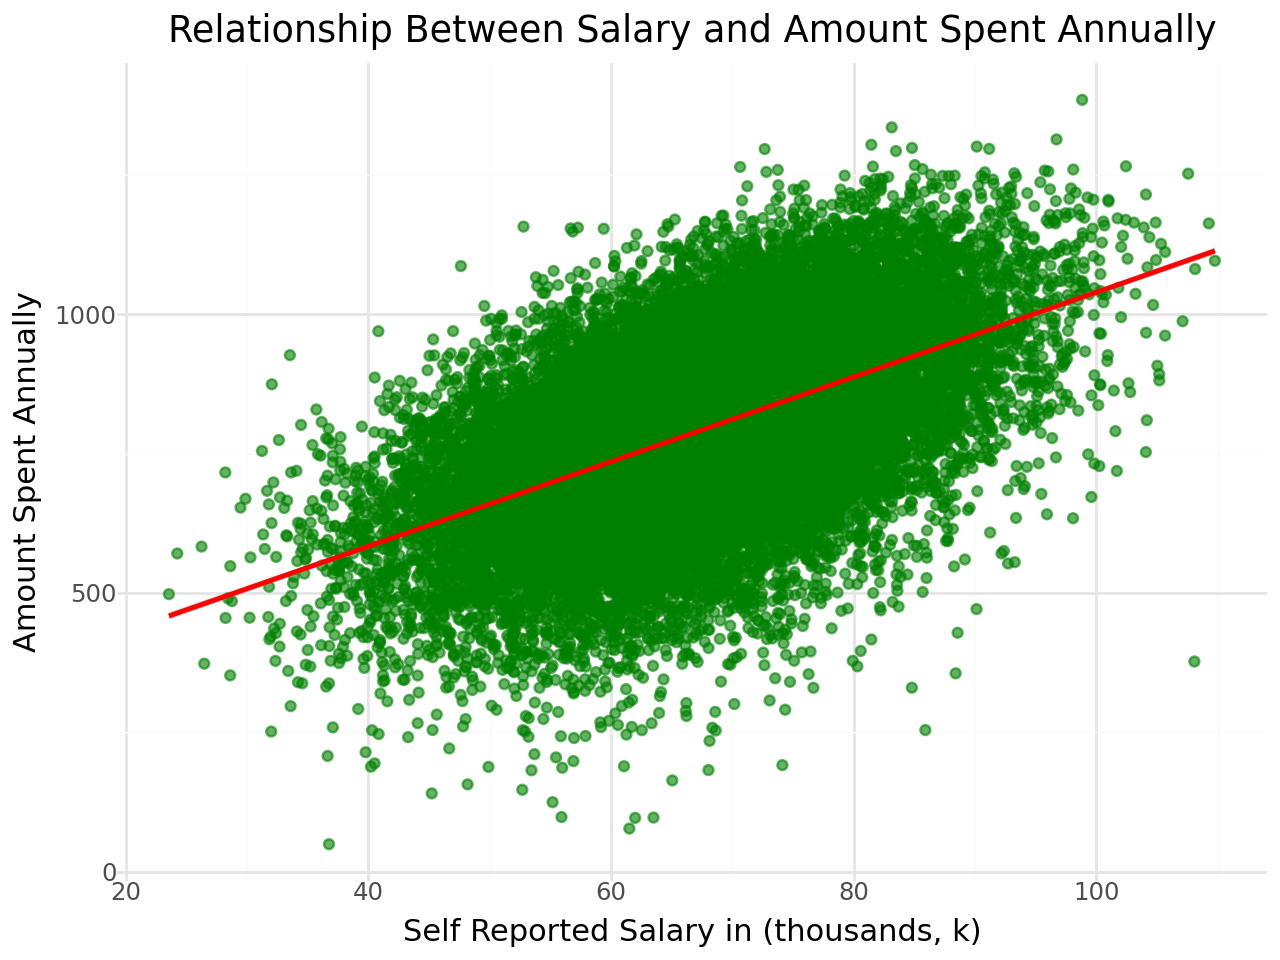

In [30]:
(ggplot(clothing, aes(x = "salary_self_report_in_k", y = "amount_spent_annual")) +
  geom_point(alpha = 0.6, color = 'green') +
  geom_smooth(method = 'lm', color = 'red') +
  labs(title = 'Relationship Between Salary and Amount Spent Annually',
       x = 'Self Reported Salary in (thousands, k)',
       y = 'Amount Spent Annually') +
 theme_minimal())

> The scatter plot between salary and amount spent show a positive linear relationship indicative of the upwarded slope regression line. This means as salary increases, the amount spent also increases.

In [38]:
# In which year did the store's customers make the most money? Were the store's sales highest in those years?
clothing_by_year_spent = clothing.groupby(['year'], as_index = False)['amount_spent_annual'].sum()
clothing_by_year

,year,amount_spent_annual
0,2019,4324217.25
1,2020,4659781.05
2,2021,5095178.27
3,2022,5713715.68


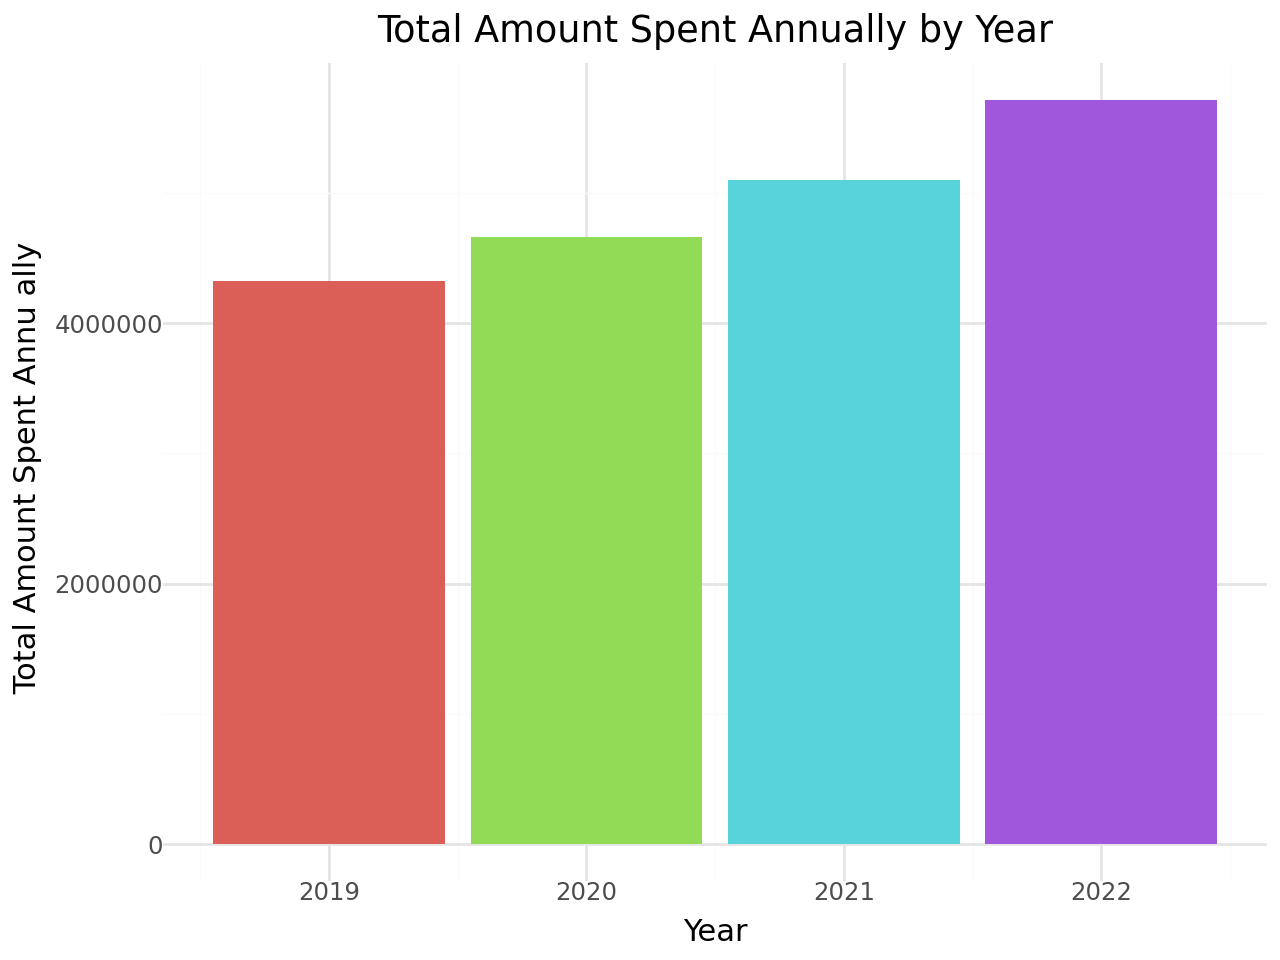

In [32]:
(ggplot(clothing_by_year_spent, aes(x = "year", y = "amount_spent_annual", fill = "factor(year)")) +
 geom_bar(stat = "identity") +
 labs(title = "Total Amount Spent Annually by Year",
      x = "Year",
      y = " Total Amount Spent Annu ally") +
 theme_minimal() +
 theme(legend_position = "none"))

> From the bar graph above, the year 2022 is the year with the highest sales.

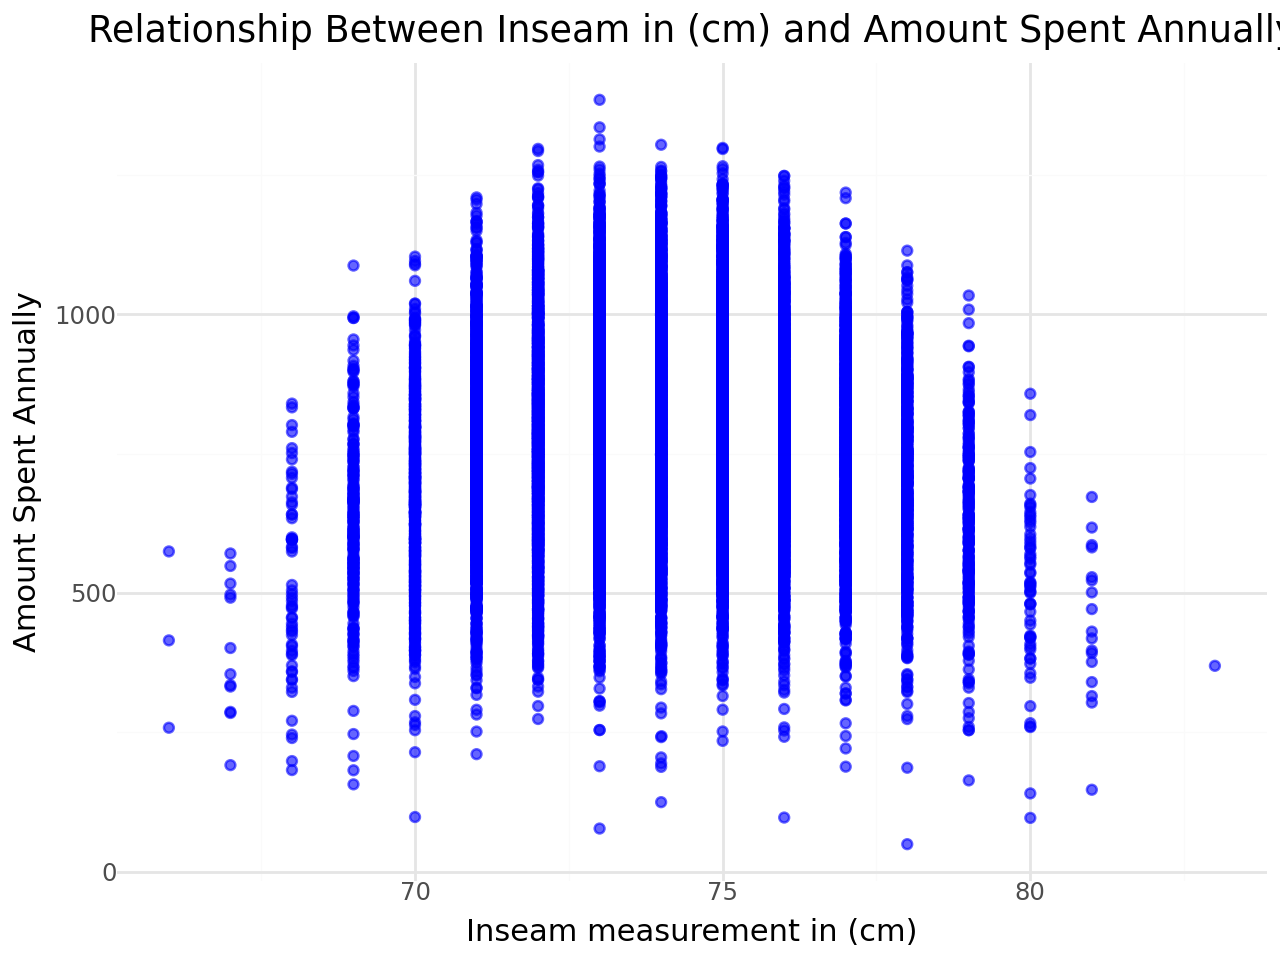

In [33]:
# People who are not your "average" size often find it difficult to buy clothes in traditional stores.
# Is there a relationship between inseam and amount spent in the store annually?
# Is there a relationship between height and amount spent in the store annually?

(ggplot(clothing, aes(x = "inseam_cm", y = "amount_spent_annual")) +
 geom_point(alpha = 0.6, color = "blue") +
 labs(title = "Relationship Between Inseam in (cm) and Amount Spent Annually",
      x = "Inseam measurement in (cm)",
      y = "Amount Spent Annually") +
 theme_minimal())

> From the graph, as inseam measurements drifts away from the average or middle, the less amount is being spent annually. This supports that the those not in the "average size" have difficulties in finding their size and spend less as a result.

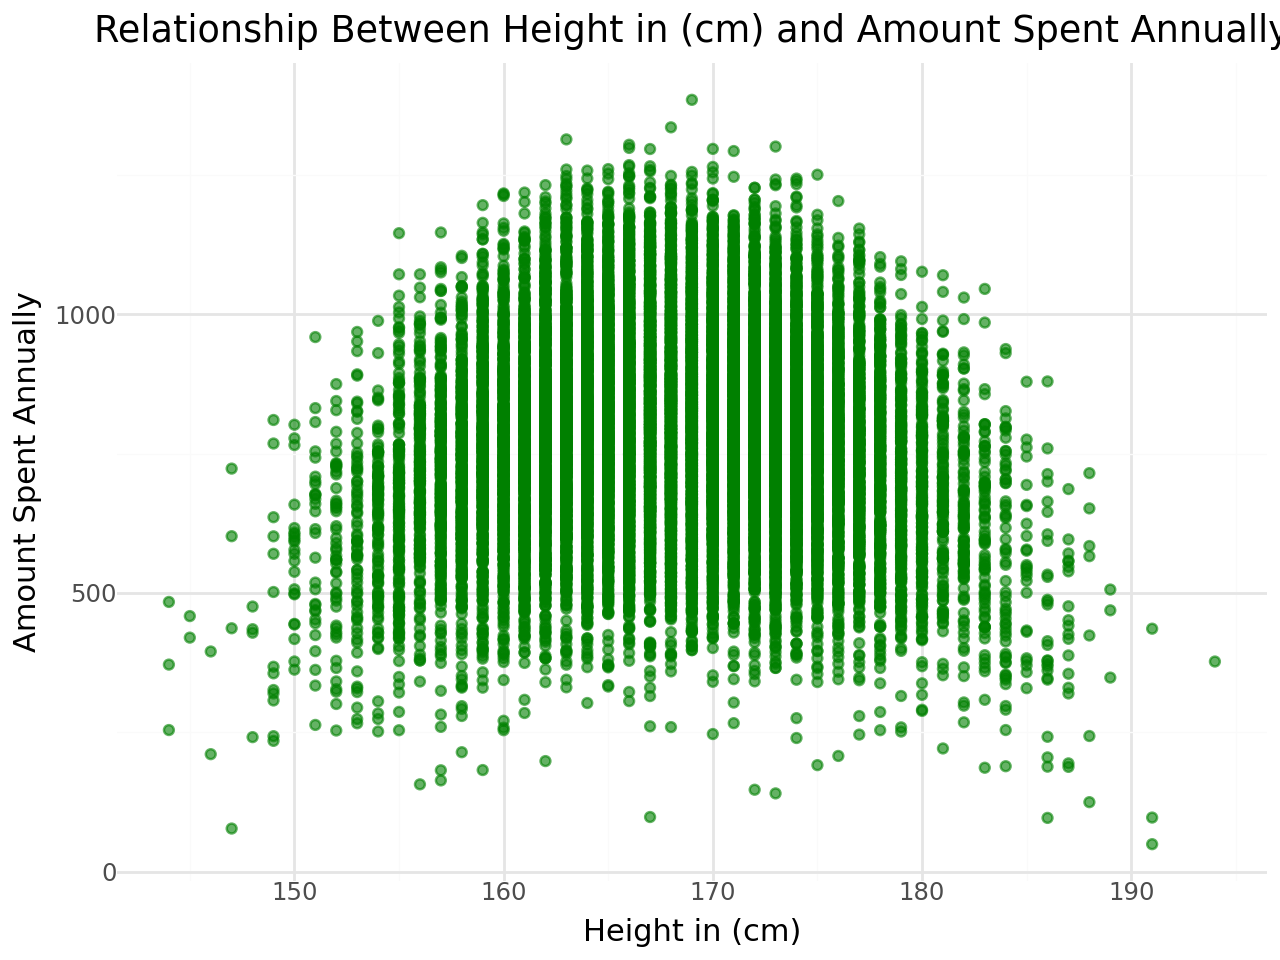

In [34]:
(ggplot(clothing, aes(x = "height_cm", y = "amount_spent_annual")) +
  geom_point(alpha = 0.6, color = "green") +
  labs(title = "Relationship Between Height in (cm) and Amount Spent Annually",
       x = "Height in (cm)",
       y = "Amount Spent Annually") +
  theme_minimal())

> The same observation from inseam measurement appears here but in relation to height in cm. As we move away from the middle or average, the amount spent decreases, supporting that those not in the average size might find it more difficult to buy or spend on clothes.

In [35]:
# In this dataset, is there a relationship between salary and height?
# Is it different for the different genders?

gender_cols = [col for col in clothing.columns if col.startswith("gender")]
gender_cols

['gender_man', 'gender_nonbinary', 'gender_other', 'gender_woman']

Plotting for: gender_man (value == 1 only)


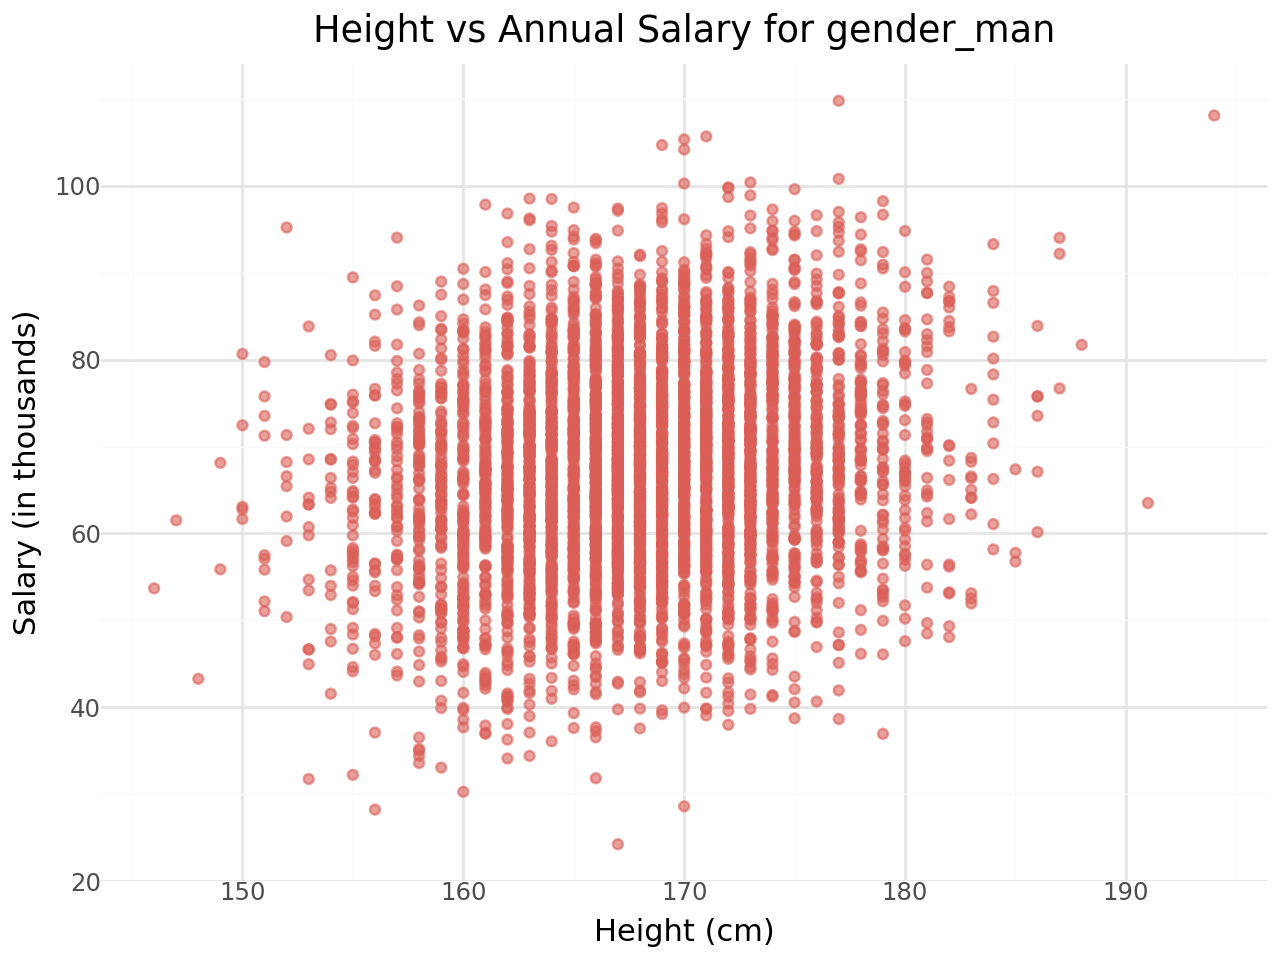

Plotting for: gender_nonbinary (value == 1 only)


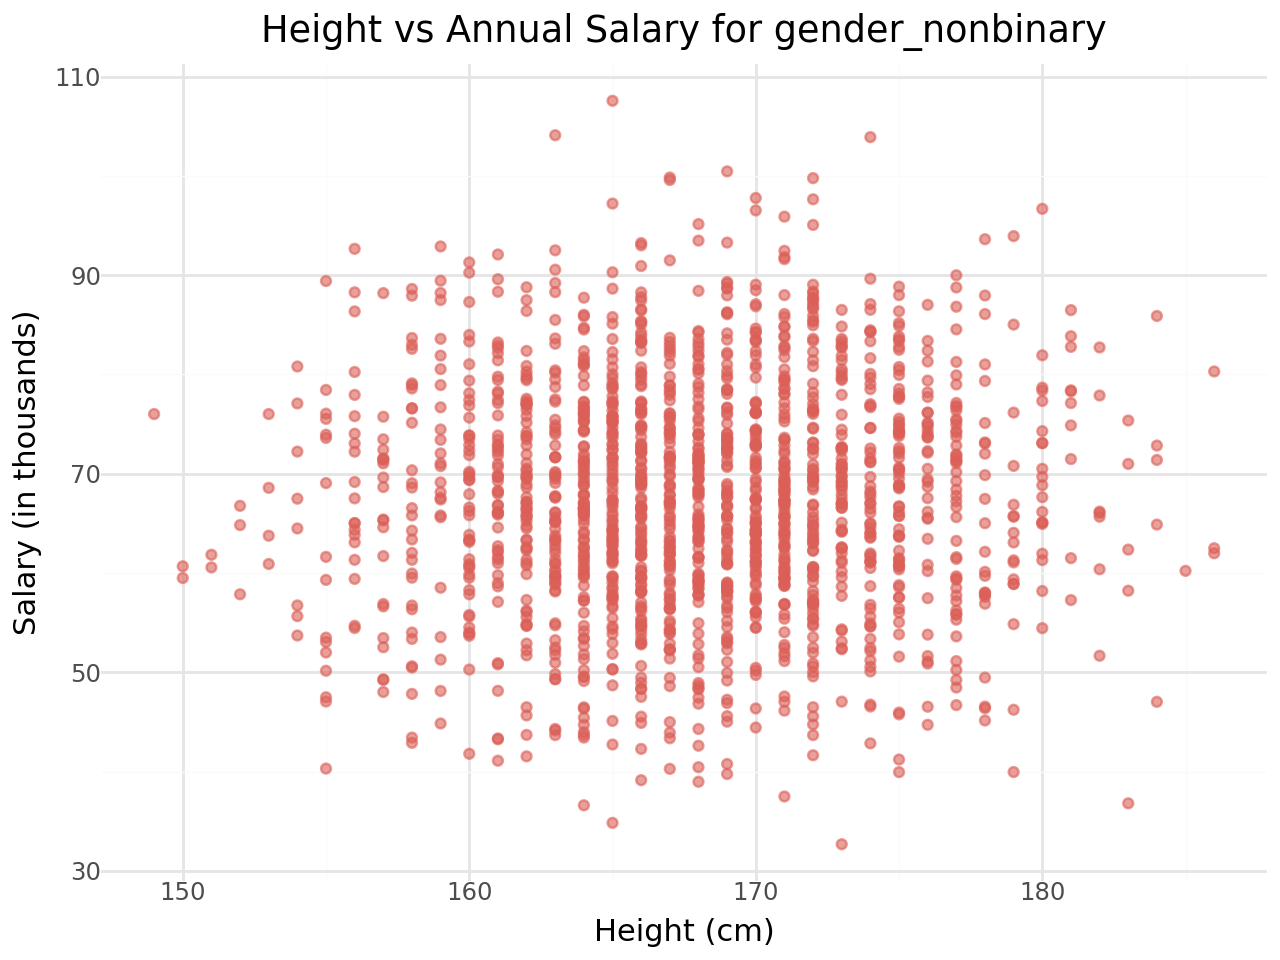

Plotting for: gender_other (value == 1 only)


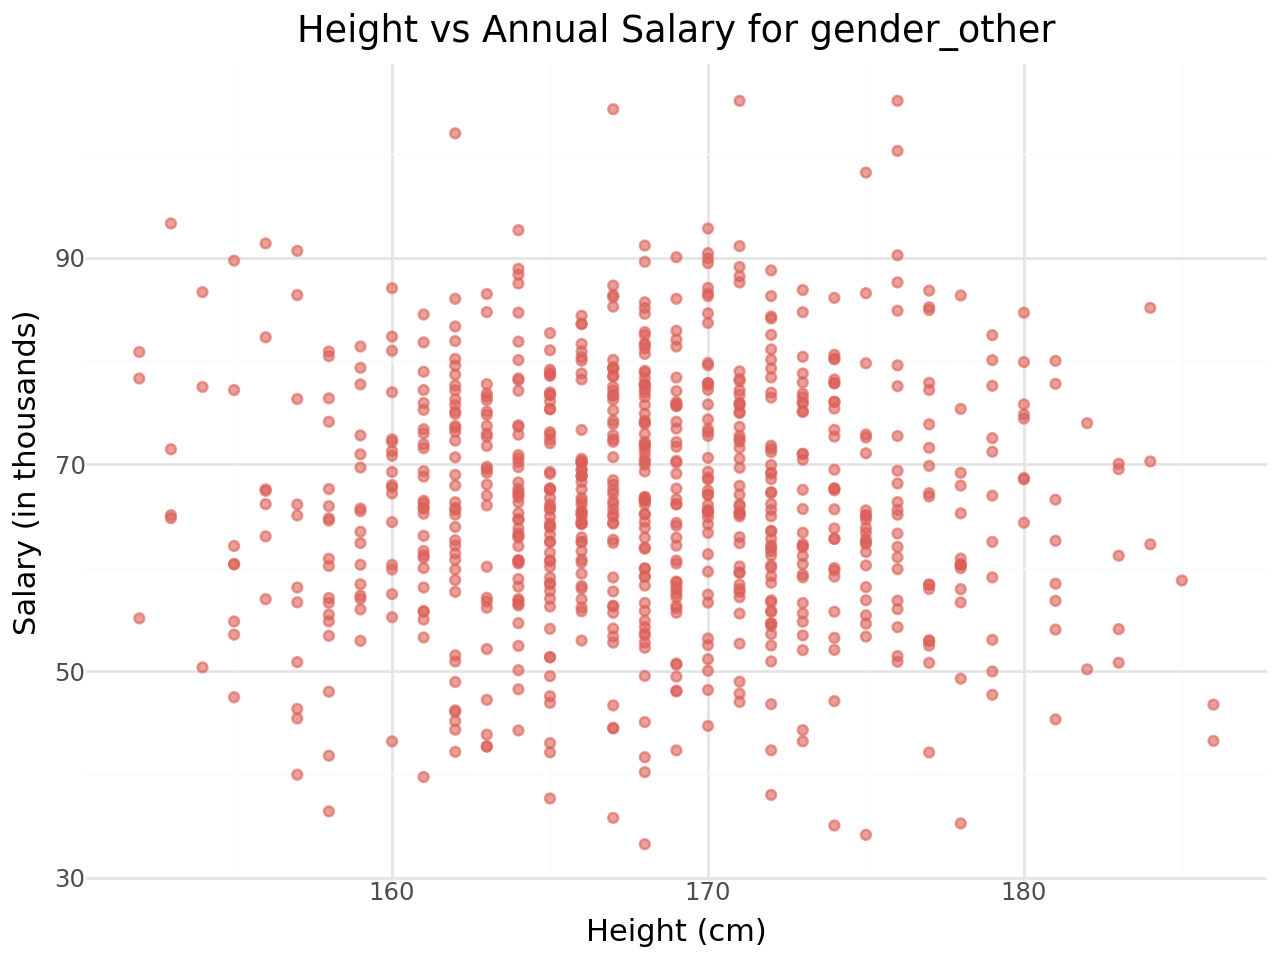

Plotting for: gender_woman (value == 1 only)


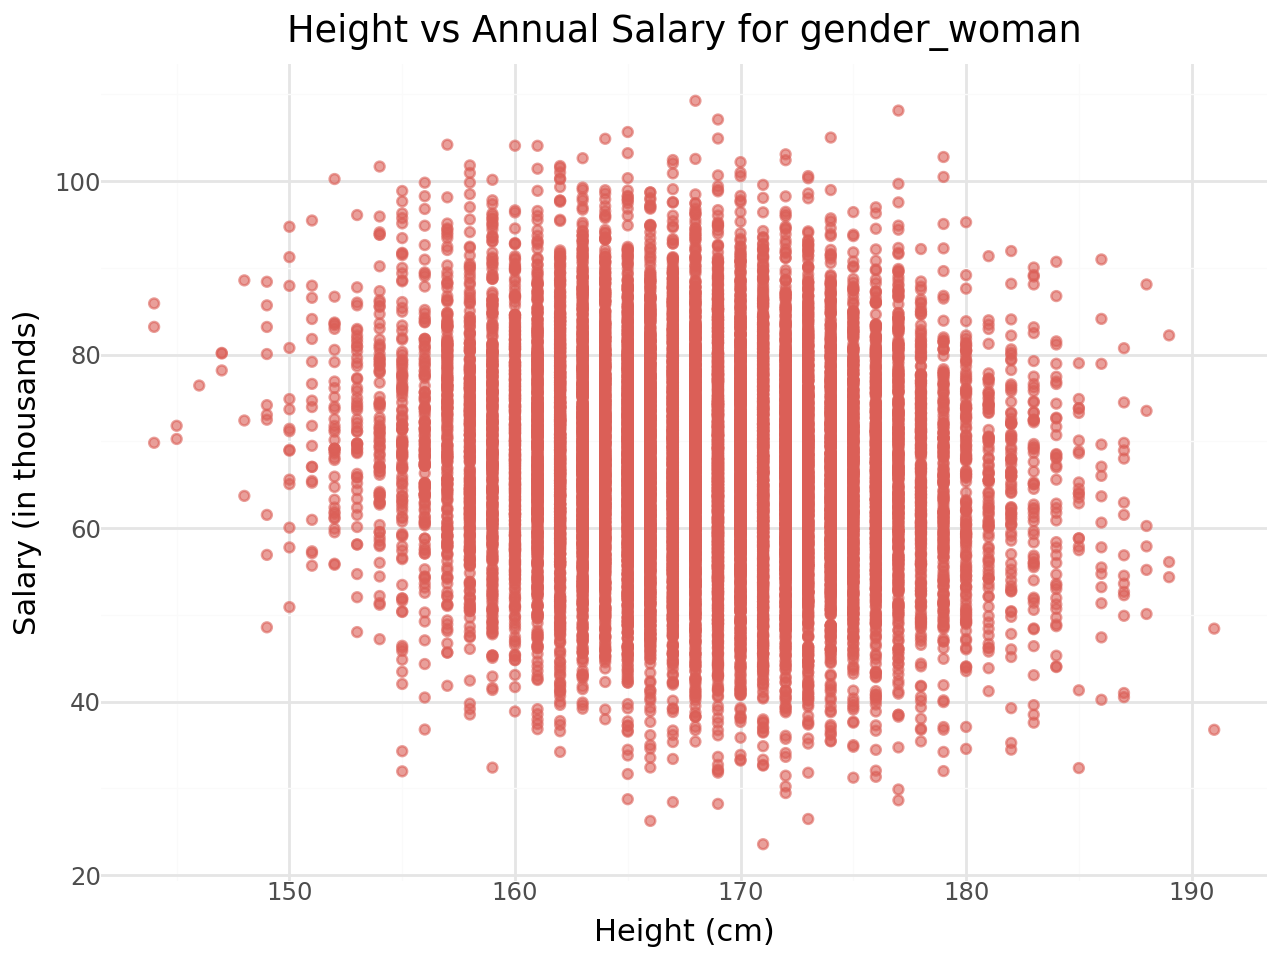

In [45]:
for col in gender_cols:
    print(f"Plotting for: {col} (value == 1 only)")
    filtered = clothing[clothing[col] == 1]  # keep only rows where col == 1
    display(
        ggplot(filtered, aes(x="height_cm", y="salary_self_report_in_k", color=col)) +
        geom_point(alpha=0.6) +
        labs(
            title=f"Height vs Annual Salary for {col}",
            x="Height (cm)",
            y="Salary (in thousands)"
        ) +
        theme_minimal() +
        theme(legend_position = "none")
    )

> In all of the plots, there is not linear relationship between salary and  height across all gender groups.

In [46]:
# The store is interested in whether their customer base has changed over time
# Present the minimum, maximum, and average height, waist size, and inseam for each year.

clothing_by_year = clothing.groupby(['year'], as_index = False)[['height_cm', 'waist_size_cm', 'inseam_cm']].describe()
clothing_by_year

year height_cm                                                           \
            count        mean       std    min    25%    50%    75%    max   
0  2019    6362.0  167.964005  6.118501  144.0  164.0  168.0  172.0  191.0   
1  2020    6171.0  168.022687  6.010186  144.0  164.0  168.0  172.0  189.0   
2  2021    6144.0  168.025879  5.976906  145.0  164.0  168.0  172.0  189.0   
3  2022    6288.0  168.097487  5.935972  144.0  164.0  168.0  172.0  194.0   

  waist_size_cm  ...               inseam_cm                                   \
          count  ...    75%    max     count       mean       std   min   25%   
0        6362.0  ...  100.0  121.0    6362.0  73.987476  2.003809  67.0  73.0   
1        6171.0  ...  100.0  121.0    6171.0  74.004255  2.023039  67.0  73.0   
2        6144.0  ...  100.0  123.0    6144.0  73.994839  2.062819  66.0  73.0   
3        6288.0  ...  100.0  125.0    6288.0  74.038386  2.020719  66.0  73.0   

                     
    50%   75%   max  
0  74.0  75.0  81.0  
1  74.0  75.0  81.0  
2  74.0  75.0  83.0  
3  74.0  75.0  81.0  

[4 rows x 25 columns]

> Analyzing the minimum, maximum, and average measurements of height, waist size, and inseam from 2019 to 2022 shows that these physical characteristics have remained relatively stable over the years. The average height hovers consistently around 168 cm, waist size around 100 cm, and inseam near 74 cm. The minimum and maximum values also show only minor fluctuations, indicating that the store’s customer body size profile has not significantly changed during this period. This consistency suggests that the store’s customer base, in terms of physical dimensions, has been fairly stable over the past four years.


>